In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('zoom_5g.csv')

In [26]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
1,2,0.000021,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,64:ff9b::90c3:814b,UDP,1084,61832 > 8801 Len=1036
2,3,0.000034,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
3,4,0.000047,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
4,5,0.000061,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,1029,8801 > 61832 Len=981


In [27]:
data.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [28]:
data1 = data.copy()
data1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
1,2,0.000021,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,64:ff9b::90c3:814b,UDP,1084,61832 > 8801 Len=1036
2,3,0.000034,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
3,4,0.000047,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,998,8801 > 61832 Len=950
4,5,0.000061,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,UDP,1029,8801 > 61832 Len=981


In [29]:
data1 = data1.drop(['No.', 'Protocol', 'Info'], axis = 1)
data1.head()

,Time,Source,Destination,Length
0,0.000000,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,998
1,0.000021,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,64:ff9b::90c3:814b,1084
2,0.000034,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,998
3,0.000047,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,998
4,0.000061,64:ff9b::90c3:814b,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,1029


In [30]:
p = data1.Source.str.startswith('64')
data1.loc[p, 'Source'] = 'phone'
p = data1.Destination.str.startswith('64')
data1.loc[p, 'Destination'] = 'phone'

In [31]:
b = data1.Source.str.contains(':')
data1.loc[b, 'Source'] = 'base'
b = data1.Destination.str.contains(':')
data1.loc[b, 'Destination'] = 'base'

In [32]:
data1.Source.unique(), data1.Destination.unique()

(array(['phone', 'base'], dtype=object),
 array(['base', 'phone'], dtype=object))

In [33]:
data1['Link'] = data1.apply(lambda a: "UL" if a.Source == 'phone' else "DL", axis = 1)

In [34]:
data1

,Time,Source,Destination,Length,Link
0,0.000000,phone,base,998,UL
1,0.000021,base,phone,1084,DL
2,0.000034,phone,base,998,UL
3,0.000047,phone,base,998,UL
4,0.000061,phone,base,1029,UL
...,...,...,...,...,...
369388,2009.164231,base,phone,307,DL
369389,2009.164247,phone,base,136,UL
369390,2009.164269,phone,base,1001,UL
369391,2009.164285,base,phone,301,DL


In [35]:
ul = []
dl = []
columns = ['time', 'traffic']

for i in data1.values:
    if i[4] == "UL":
        ul.append([i[0], int(i[3])])
    elif i[4] == "DL":
        dl.append([i[0], int(i[3])])

ul = np.array(ul)
dl = np.array(dl)

In [36]:
a = np.arange(1, 2011)    # 기록 시간
a = set(a)
b = []
ult = ul.T[0]
for i in ult:
    b.append(int(i))
b = set(b)
# print(a-b)

In [37]:
ul_bitrate = []
dl_bitrate = []

tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in ul:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(ul) - 1:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])


In [38]:
a = np.arange(1, 2011)
a = set(a)
b = []
dlt = dl.T[0]
for i in dlt:
    b.append(int(i))
b = set(b)
print(a-b)

{1841, 2010, 1118}


In [39]:
tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in dl:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(dl) - 1:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        

In [40]:
print(len(ul_bitrate))
print(len(dl_bitrate))

2006
2007


In [41]:
ul_bitrate = np.array(ul_bitrate)
dl_bitrate = np.array(dl_bitrate)

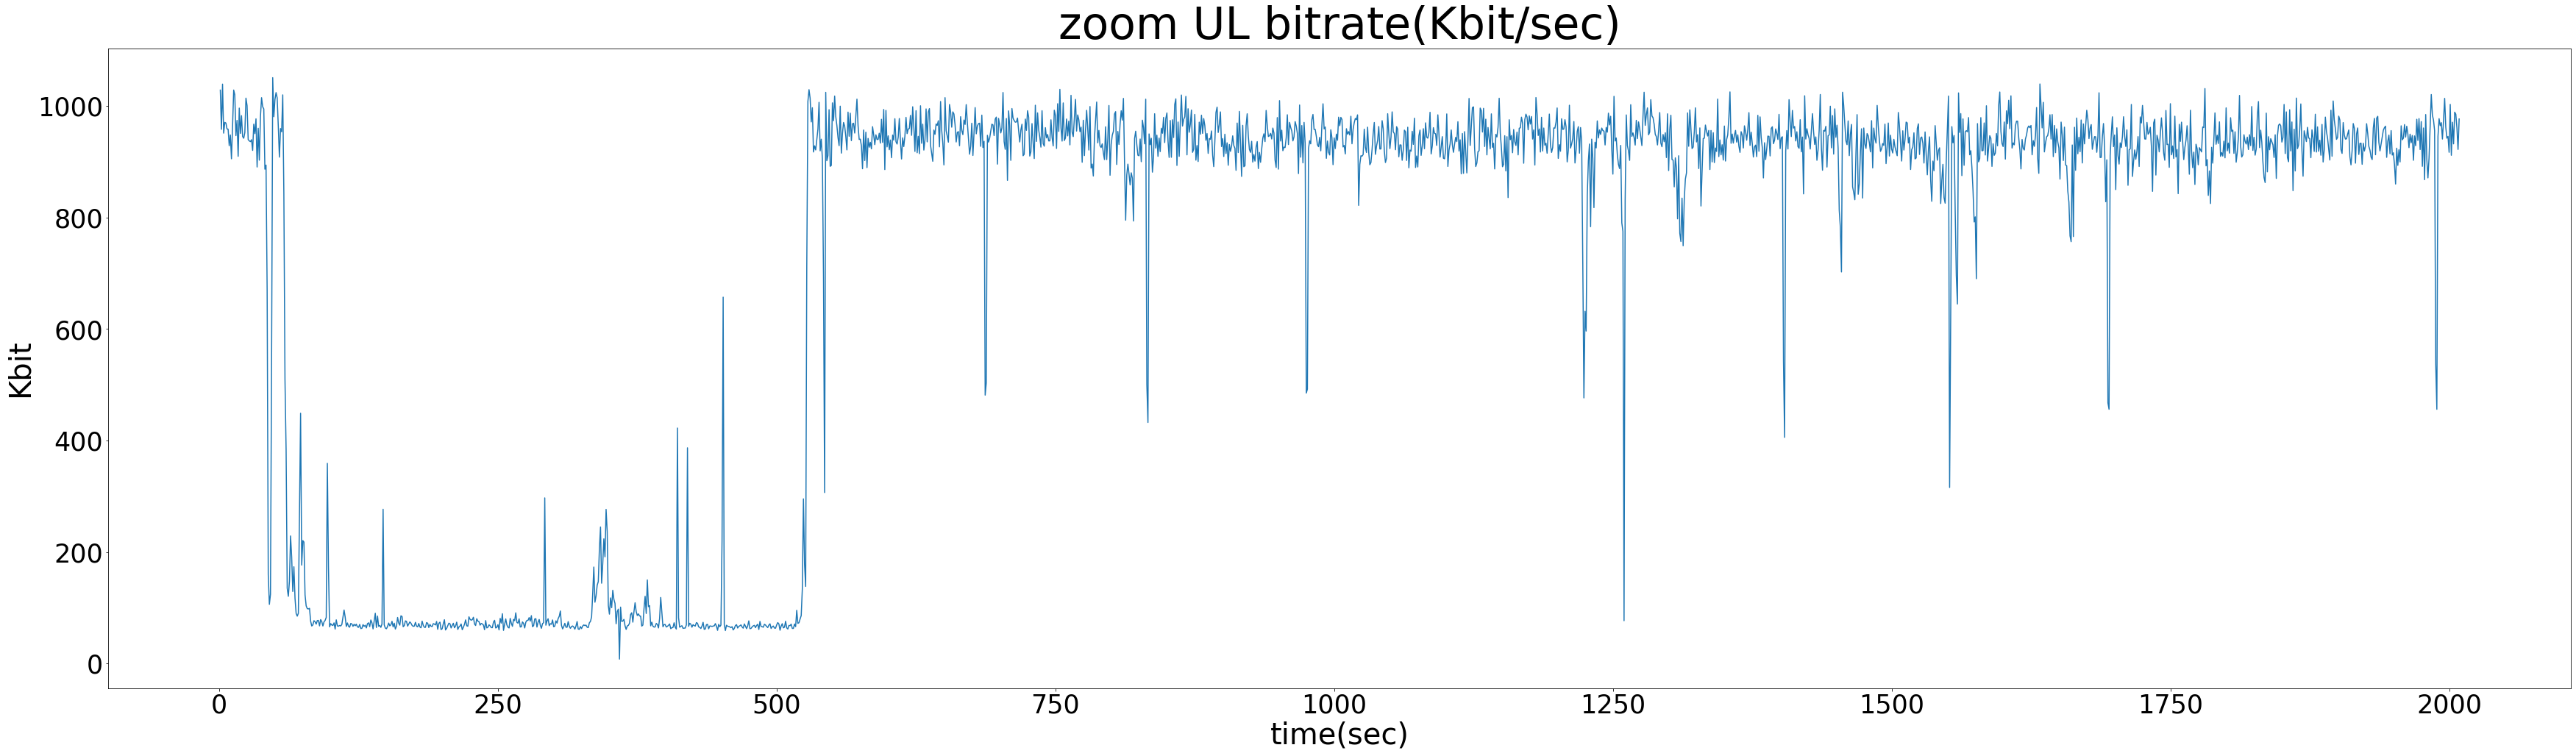

In [42]:
plt.figure(figsize=(60,16))
plt.title('zoom UL bitrate(Kbit/sec)', fontsize=60)
plt.xlabel('time(sec)', fontsize=40)
plt.ylabel('Kbit', fontsize=40)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.plot(ul_bitrate[:,0], ul_bitrate[:,1])
plt.show()

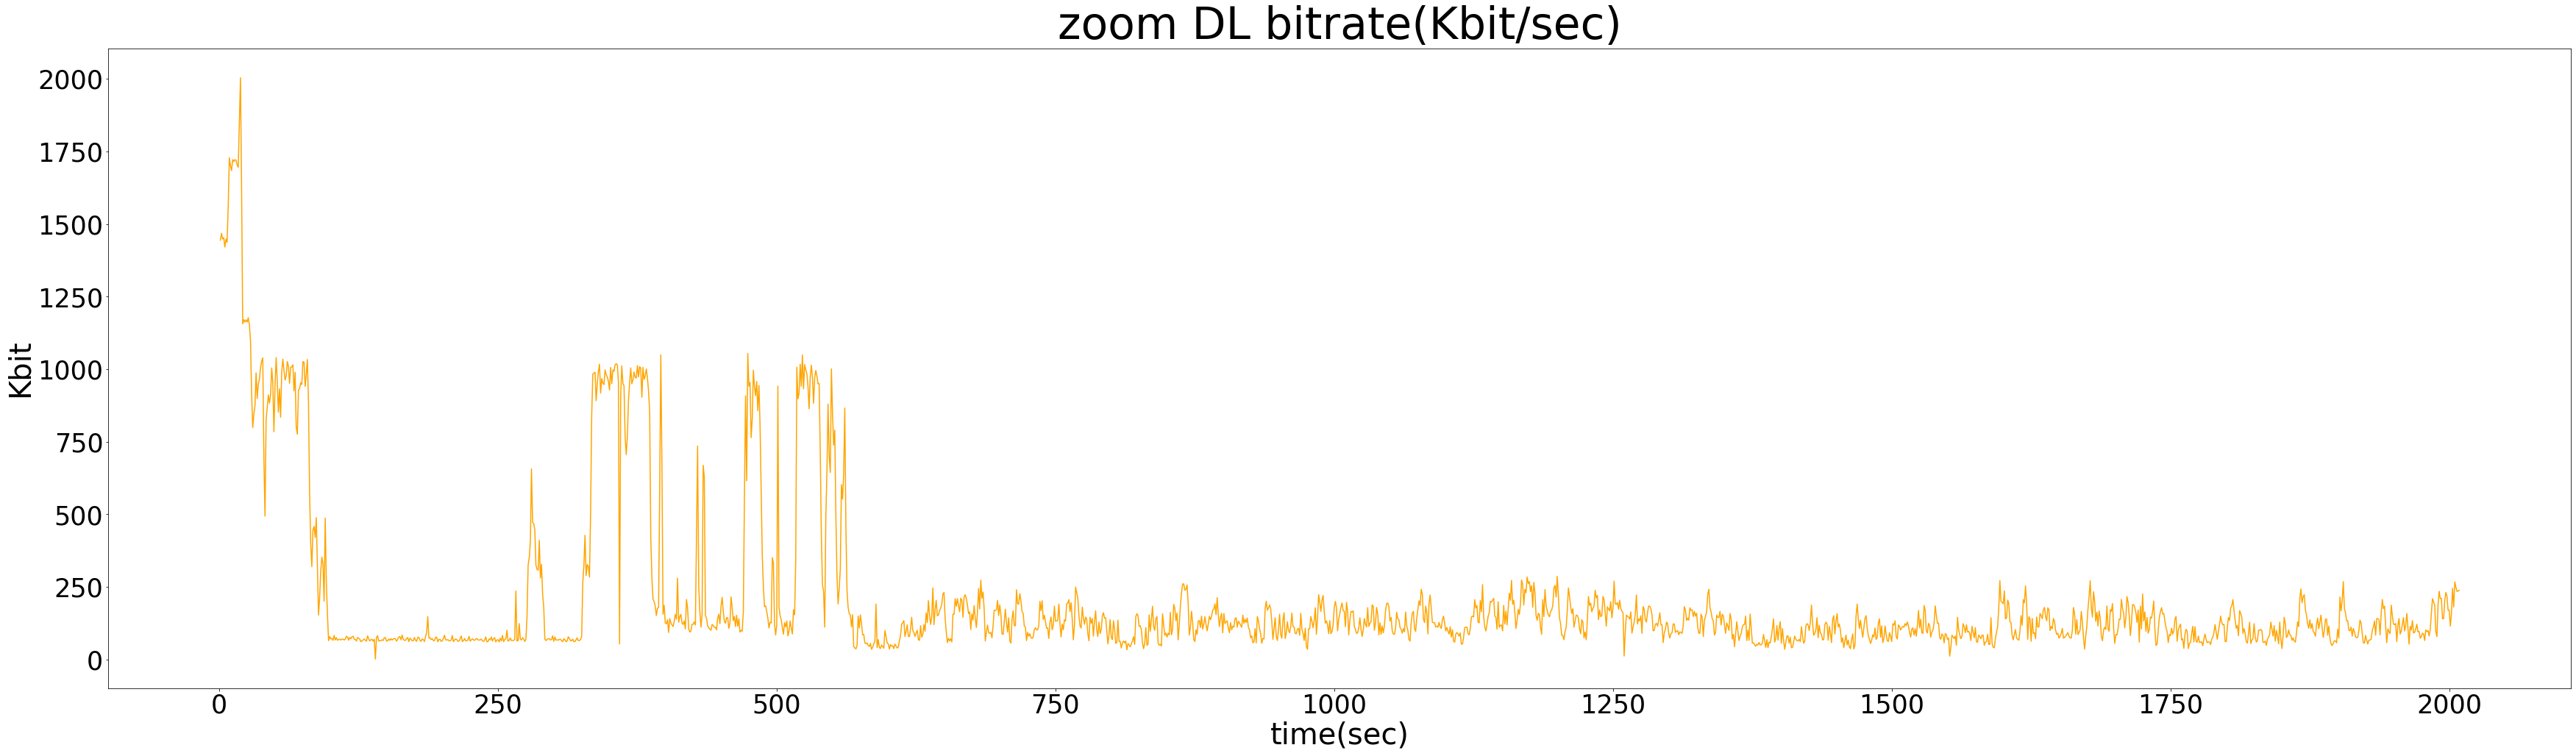

In [43]:
plt.figure(figsize=(60,16))
plt.title('zoom DL bitrate(Kbit/sec)', fontsize=60)
plt.xlabel('time(sec)', fontsize=40)
plt.ylabel('Kbit', fontsize=40)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.plot(dl_bitrate[:,0], dl_bitrate[:,1], color = 'orange')
plt.show()

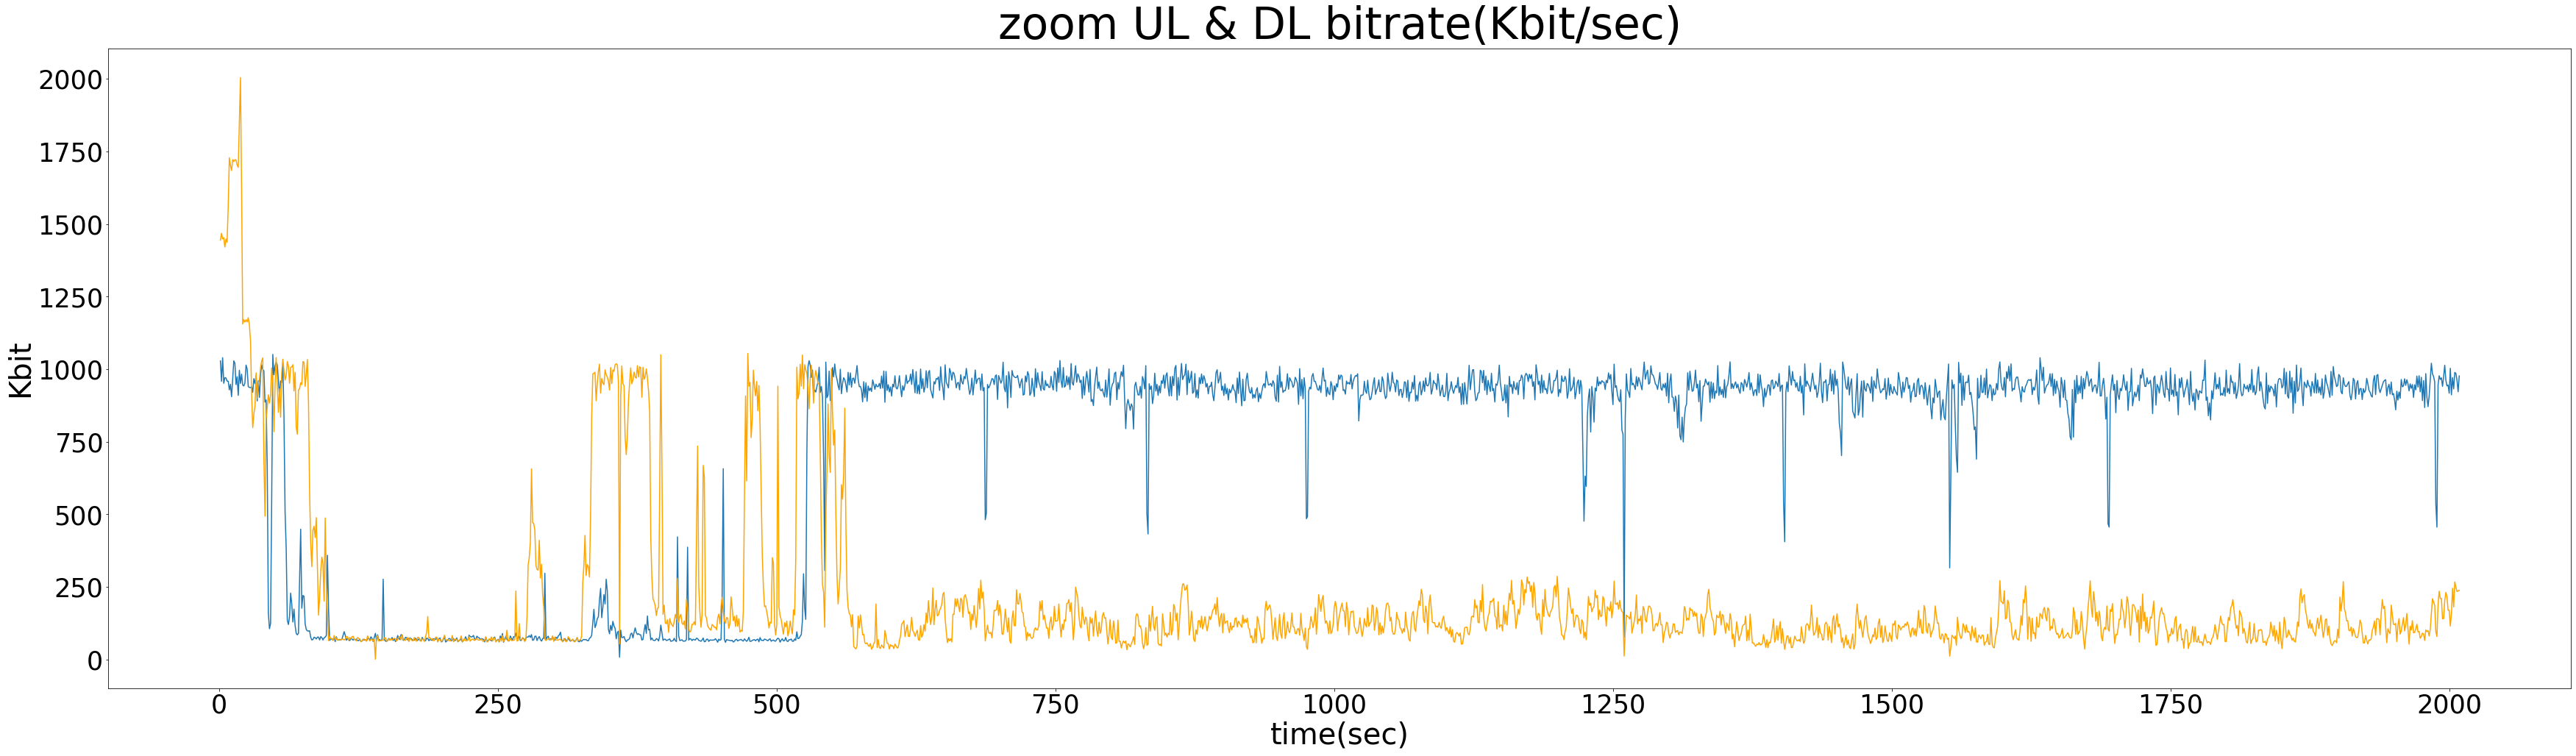

In [44]:
plt.figure(figsize=(60,16))
plt.title('zoom UL & DL bitrate(Kbit/sec)', fontsize=60)
plt.xlabel('time(sec)', fontsize=40)
plt.ylabel('Kbit', fontsize=40)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.plot(ul_bitrate[:,0], ul_bitrate[:,1])
plt.plot(dl_bitrate[:,0], dl_bitrate[:,1], color = 'orange')
plt.show()

In [45]:
df = pd.DataFrame(ul_bitrate)
df

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

seq= df[[1]].to_numpy()

In [46]:
def seq2dataset(seq,window, horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x= seq[i:i+window]
        y= seq[i+window+horizon-1]
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y= seq2dataset(seq,w,h)

In [47]:
split = int(len(X)*0.7)
x_train= X[0:split]; y_train = Y[0:split]
x_test= X[split:]; y_test = Y[split:]

In [48]:
model=Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist=model.fit(x_train,y_train, epochs=200, batch_size=1, validation_data=(x_test,y_test), verbose=1)

Epoch 1/200
1399/1399 [==============================] - 4s 3ms/step - loss: 65.3049 - mae: 65.3049 - val_loss: 44.5201 - val_mae: 44.5201
Epoch 2/200
1399/1399 [==============================] - 3s 2ms/step - loss: 50.5967 - mae: 50.5967 - val_loss: 90.7188 - val_mae: 90.7188
Epoch 3/200
1399/1399 [==============================] - 3s 2ms/step - loss: 48.6164 - mae: 48.6164 - val_loss: 44.7809 - val_mae: 44.7809
Epoch 4/200
1399/1399 [==============================] - 3s 2ms/step - loss: 48.9302 - mae: 48.9302 - val_loss: 46.5740 - val_mae: 46.5740
Epoch 5/200
1399/1399 [==============================] - 3s 2ms/step - loss: 48.9558 - mae: 48.9558 - val_loss: 41.9235 - val_mae: 41.9235
Epoch 6/200
1399/1399 [==============================] - 3s 2ms/step - loss: 44.9464 - mae: 44.9464 - val_loss: 41.0860 - val_mae: 41.0860
Epoch 7/200
1399/1399 [==============================] - 3s 2ms/step - loss: 45.1193 - mae: 45.1193 - val_loss: 54.2737 - val_mae: 54.2737
Epoch 8/200
1399/1399 [====

손실 함수 40.12218475341797 MAE: 40.12218475341797
평균 절댓값 백분율 오차(MAPE) [0.04720594]


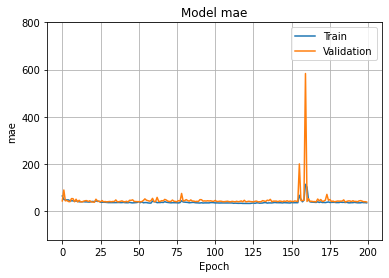

In [51]:
ev=model.evaluate(x_test,y_test, verbose=0)
print("손실 함수", ev[0], "MAE:",ev[1])

pred=model.predict(x_test)
print("평균 절댓값 백분율 오차(MAPE)", sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([-120, 800])
plt.legend(['Train', 'Validation'],loc='best')
plt.grid()
plt.show()

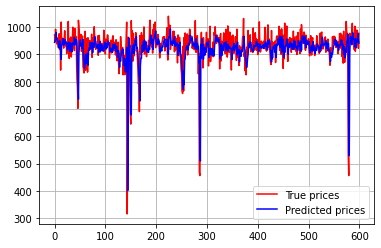

In [50]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()